In [529]:
import pandas as pd
import numpy as np

In [530]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [531]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [322]:
import seaborn as sns

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

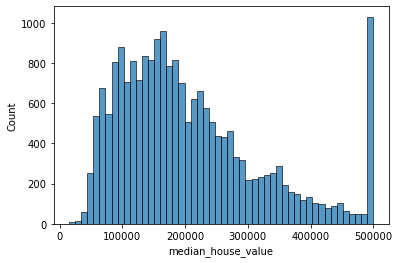

In [323]:
sns.histplot(data['median_house_value'],bins=50)

In [500]:
df_selected = data[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [288]:
df_selected

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Question 1

Find a feature with missing values. How many missing values does it have?

In [289]:
df_selected.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

What's the median (50% percentile) for variable 'population'?

In [290]:
df_selected['population'].median()

1166.0

In [291]:
np.percentile(df_selected['population'],50)

1166.0

Shuffle the initial dataset, use seed 42.

In [373]:
n = len(df_selected)

In [374]:
n

20640

In [375]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-(n_val+n_test)

In [376]:
n_val+n_test+n_train

20640

In [532]:
idx = np.arange(n)


In [533]:
np.random.seed(42)
np.random.shuffle(idx)

In [298]:
idx

array([20558, 11430,  2656, ...,  5014,  9979,   501])

In [299]:
df_shuffled = df_selected.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [300]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20558,38.67,-121.80,10.0,2086.0,380.0,1073.0,378.0,4.5526,154400.0
11430,33.66,-117.97,22.0,3914.0,600.0,1871.0,607.0,5.8541,281500.0
2656,40.28,-124.25,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
14267,32.69,-117.11,37.0,2395.0,627.0,2489.0,599.0,1.5933,86300.0
3684,34.21,-118.37,36.0,1392.0,326.0,1181.0,303.0,3.1563,176400.0
...,...,...,...,...,...,...,...,...,...
14307,32.71,-117.14,52.0,500.0,NaN,480.0,108.0,1.8696,91100.0
8449,33.91,-118.35,19.0,1949.0,559.0,1282.0,498.0,2.7813,231300.0
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0
8032,33.83,-118.13,44.0,1710.0,333.0,786.0,344.0,4.2917,314700.0


Make sure that the target value ('median_house_value') is not in your dataframe.

In [301]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options

In [260]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income'
]

Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [132]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [133]:
X_train = prepare_X(df_train)

In [134]:
X_train.shape

(12384, 8)

In [135]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [136]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [150]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

In [151]:
 def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(df['total_bedrooms'].mean())
    X = df_num.values
    return X

In [152]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

# Question 4

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

In [154]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3428038945096282

In [155]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)
    
    print(r, w0, score)

0.0 -11.656344589524409 0.34
1e-05 -11.656185700509292 0.34
0.0001 -11.654755895130503 0.34
0.001 -11.640477103333314 0.34
0.1 -10.257998426792371 0.34
1 -4.931613572647107 0.35
10 -0.7941313736967599 0.35


# Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [520]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [521]:
idx = np.arange(n)

In [522]:
rmse_array = []

In [578]:
for seed in seed_values:
    np.random.seed(seed)
    np.random.shuffle(idx)
    print(seed)
    df_shuffled = df_selected.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_er = (rmse(y_val, y_pred))
    print(rmse_er)
    rmse_array.append(rmse_er)


0
0.568649684502244
1
0.5687170131308235
2
0.568996725746431
3
0.5686230477964236
4
0.5685213506814843
5
0.5685858135414017
6
0.5689712222702235
7
0.5688190891487552
8
0.5693058508401883
9
0.5685501551541567


In [527]:
rmse_array

[0.5689798262294293,
 0.5690211752261365,
 0.568762861967417,
 0.568611361168391,
 0.5688277534268664,
 0.5688802210815082,
 0.5686053833382511,
 0.5686877677479346,
 0.5685222584742424,
 0.568893095861582,
 0.5687484003549521,
 0.5687354683239068,
 0.5685309042004234,
 0.5685377503776544,
 0.5686211169336816,
 0.5686033725638685,
 0.5691182749815351,
 0.5690475199702064,
 0.5682121373731159,
 0.5690742216091396]

In [577]:
round(np.std(rmse_array),3)

0.0

# Question 6

Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [575]:
np.random.seed(9)
np.random.shuffle(idx)

In [576]:
idx

array([ 8268,  5049, 13796, ...,  9312,  7064,  5095])

In [562]:
df_shuffled = df_selected.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [537]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6305,34.00,-117.88,32.0,265.0,51.0,170.0,50.0,3.9375,187500.0
11240,33.81,-117.95,33.0,1724.0,291.0,943.0,285.0,5.1180,195200.0
66,37.81,-122.30,48.0,1455.0,354.0,788.0,332.0,0.8056,84400.0
10302,33.89,-117.80,25.0,3121.0,381.0,1278.0,389.0,7.0217,357900.0
13852,34.51,-117.28,10.0,4676.0,884.0,2845.0,812.0,3.0181,100400.0
...,...,...,...,...,...,...,...,...,...
5549,33.97,-118.38,42.0,1859.0,337.0,813.0,326.0,6.0190,294500.0
3522,34.27,-118.50,35.0,2235.0,390.0,1148.0,416.0,4.8690,221600.0
4304,34.09,-118.30,25.0,2345.0,852.0,2860.0,862.0,1.4497,205600.0
5756,34.18,-118.29,52.0,1602.0,265.0,667.0,251.0,5.0490,323500.0


In [538]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [539]:
df_full_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,34.00,-117.88,32.0,265.0,51.0,170.0,50.0,3.9375,187500.0
1,33.81,-117.95,33.0,1724.0,291.0,943.0,285.0,5.1180,195200.0
2,37.81,-122.30,48.0,1455.0,354.0,788.0,332.0,0.8056,84400.0
3,33.89,-117.80,25.0,3121.0,381.0,1278.0,389.0,7.0217,357900.0
4,34.51,-117.28,10.0,4676.0,884.0,2845.0,812.0,3.0181,100400.0
...,...,...,...,...,...,...,...,...,...
16507,36.64,-121.79,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0
16508,34.15,-118.61,32.0,4491.0,815.0,1696.0,749.0,4.9102,319100.0
16509,35.48,-120.65,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
16510,33.97,-118.31,52.0,1629.0,277.0,819.0,288.0,3.7250,142600.0


In [540]:
X_full_train = df_full_train.fillna(0).values

In [541]:
X_full_train.shape

(16512, 9)

In [542]:
y_full_train = np.concatenate([y_train, y_val])

In [543]:
y_full_train.shape

(16512,)

In [544]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [545]:
X_test = df_test.fillna(0).values

In [546]:
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.5799401789725158